In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

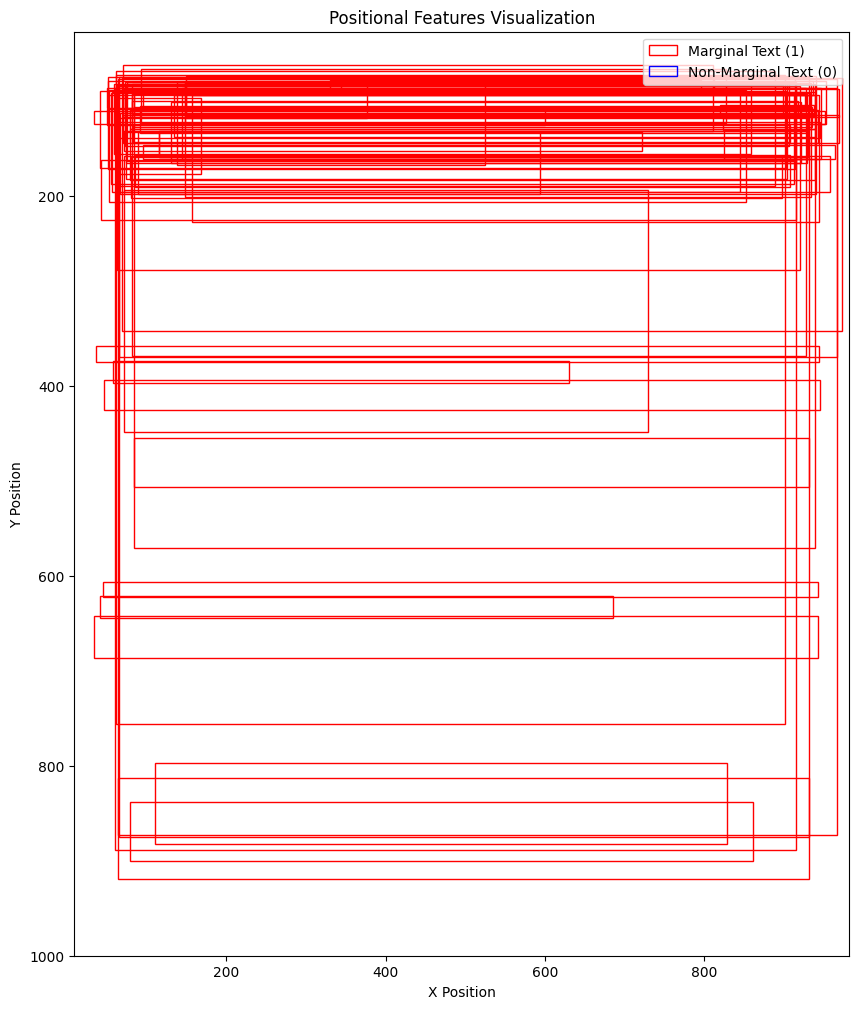

In [2]:
# Load the data
csv_file = "./data/train_pos_set.csv" 
data = pd.read_csv(csv_file)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 12))

# Determine the bounds of the plot based on your data
x_min, x_max = data['posLeft'].min(), data['posRight'].max()
y_min, y_max = data['posUpper'].min(), data['posLower'].max()

# Loop through each row to draw rectangles
for _, row in data.iterrows():
    color = 'red' if row['marginal_text'] == 1 else 'blue'
    #if row['marginal_text'] == 1:
    if row['merged'] == 1:
        rect = Rectangle(
            (row['posLeft'], row['posUpper']),  # (x, y) lower-left corner
            row['posRight'] - row['posLeft'],  # width
            row['posLower'] - row['posUpper'],  # height
            edgecolor=color,
            facecolor='none'
            )
        ax.add_patch(rect)

# Set plot limits dynamically
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)  # Inverted Y-axis for page layout

# Add labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Positional Features Visualization')

# Add a legend
handles = [Rectangle((0, 0), 1, 1, edgecolor='red', facecolor='none'),
           Rectangle((0, 0), 1, 1, edgecolor='blue', facecolor='none')]
ax.legend(handles, ['Marginal Text (1)', 'Non-Marginal Text (0)'], loc='upper right')

plt.show()

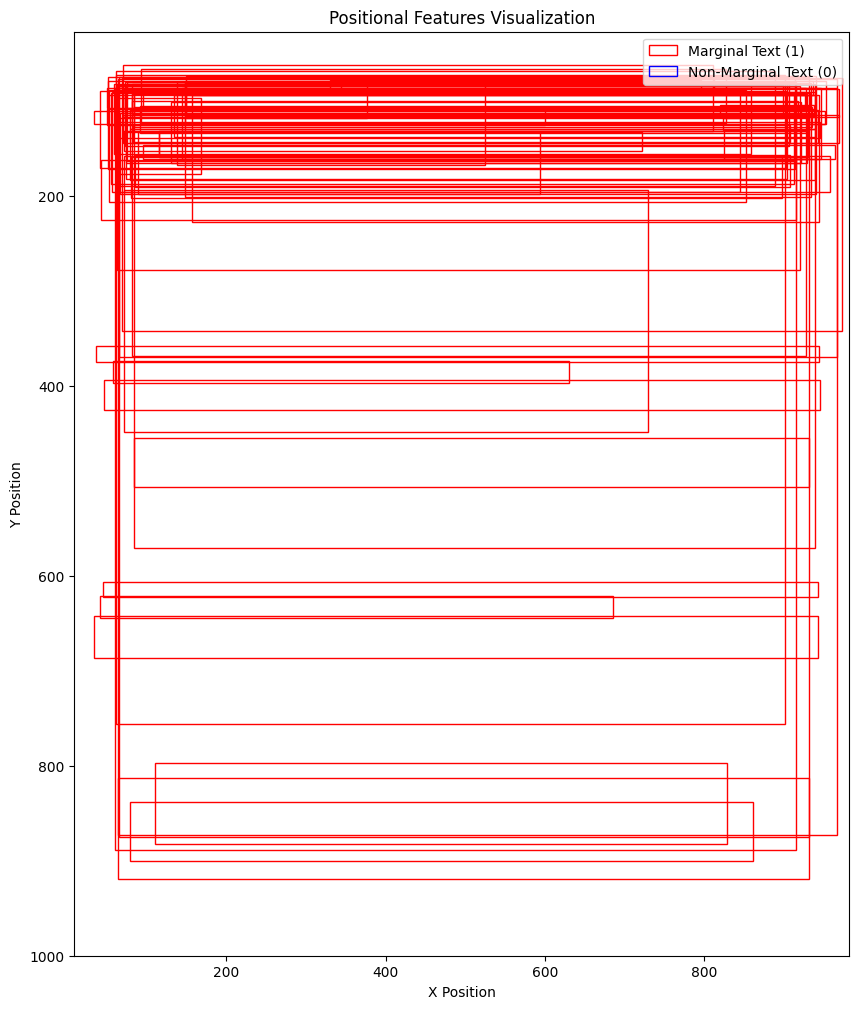

In [3]:
# Load the data
csv_file = "./data/train_pos_set.csv" 
data = pd.read_csv(csv_file)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 12))

# Determine the bounds of the plot based on your data
x_min, x_max = data['posLeft'].min(), data['posRight'].max()
y_min, y_max = data['posUpper'].min(), data['posLower'].max()

# Loop through each row to draw rectangles
for _, row in data.iterrows():
    color = 'red' if row['marginal_text'] == 1 else 'blue'
    #if row['marginal_text'] == 1:
    if row['merged'] == 1:
        rect = Rectangle(
            (row['posLeft'], row['posUpper']),  # (x, y) lower-left corner
            row['posRight'] - row['posLeft'],  # width
            row['posLower'] - row['posUpper'],  # height
            edgecolor=color,
            facecolor='none'
            )
        ax.add_patch(rect)

# Set plot limits dynamically
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)  # Inverted Y-axis for page layout

# Add labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Positional Features Visualization')

# Add a legend
handles = [Rectangle((0, 0), 1, 1, edgecolor='red', facecolor='none'),
           Rectangle((0, 0), 1, 1, edgecolor='blue', facecolor='none')]
ax.legend(handles, ['Marginal Text (1)', 'Non-Marginal Text (0)'], loc='upper right')

plt.show()

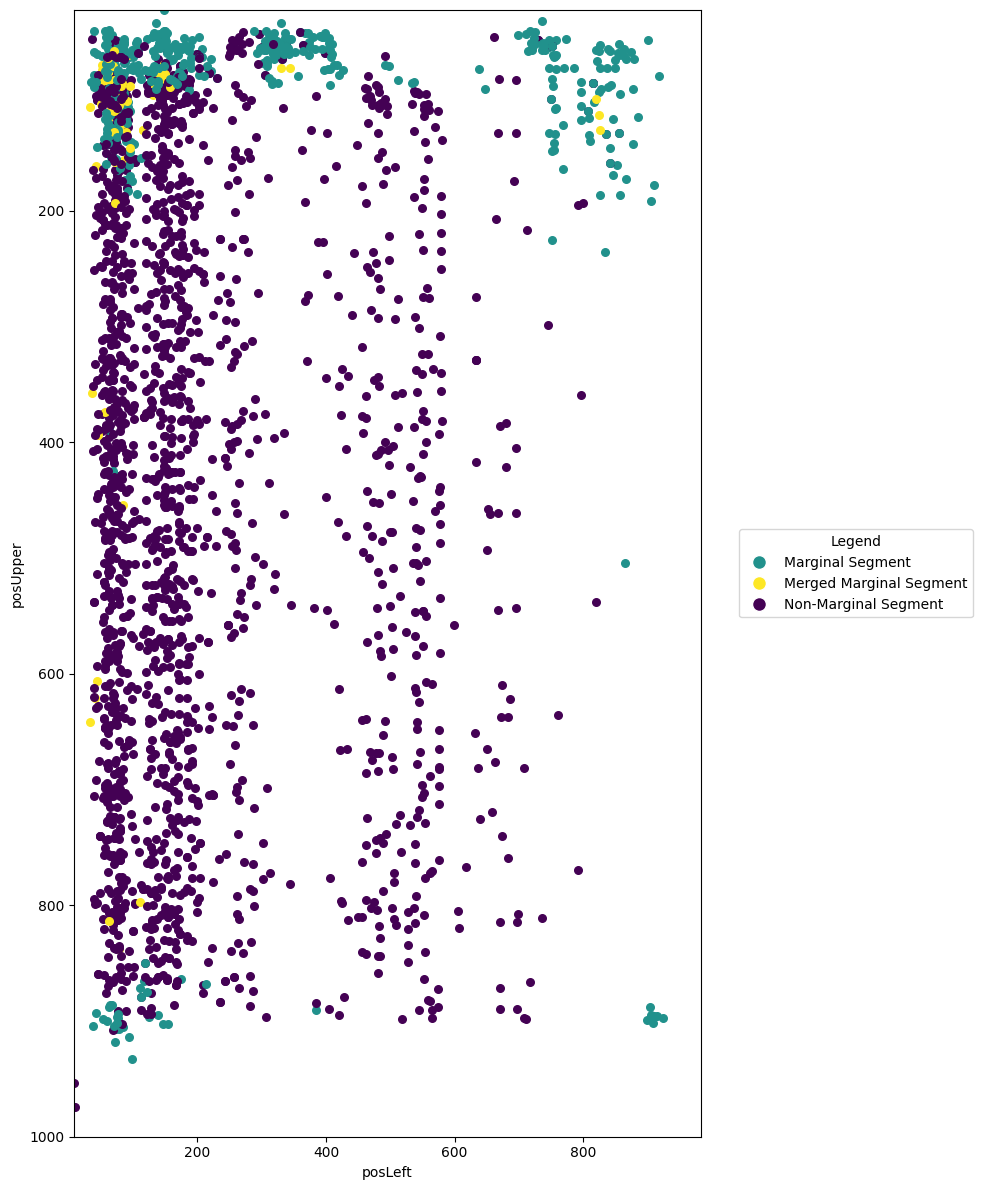

In [12]:
# Load the data
csv_file = "./data/train_pos_set.csv" 
data = pd.read_csv(csv_file)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 12))

# Determine the bounds of the plot based on your data
x_min, x_max = data['posLeft'].min(), data['posRight'].max()
y_min, y_max = data['posUpper'].min(), data['posLower'].max()

# Loop through each row to draw rectangles
for _, row in data.iterrows():
    color = '#440154' if (row['merged'] == 0 and row['marginal_text'] == 0) else '#21918c' if (row['marginal_text'] == 1 and row['merged'] == 0) else '#fde725'

    #color = '#fde725' if row['merged'] == 1 else '#21918c' if row['marginal_text'] == 1 else '#3b528b'
    #if row['marginal_text'] == 1:
    #if row['merged'] == 1:
    ax.scatter(row['posLeft'], row['posUpper'], color=color, label=None, s=30)

# Set plot limits dynamically
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)  # Inverted Y-axis for page layout

# Add labels and title
ax.set_xlabel('posLeft')
ax.set_ylabel('posUpper')
#ax.set_title('Positional Features Visualization')

# Add a legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#21918c', markersize=10, label='Marginal Segment'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#fde725', markersize=10, label='Merged Marginal Segment'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#440154', markersize=10, label='Non-Marginal Segment')
]
ax.legend(
    handles=handles,
    loc='center left',  
    bbox_to_anchor=(1.05, 0.5), 
    title="Legend"
)

plt.tight_layout()
plt.show()

In [4]:
# Check number of nan values

csv_file = "./data/train_pos_set.csv" 
data = pd.read_csv(csv_file)
print(data.columns)
columns_to_check = ["posLeft","posUpper","posRight","posLower"]
nan_train = data[columns_to_check].isna().any(axis=1).sum()

csv_file = "./data/test_pos_set.csv" 
data = pd.read_csv(csv_file)
nan_test = data[columns_to_check].isna().any(axis=1).sum()

csv_file = "./data/val_pos_set.csv" 
data = pd.read_csv(csv_file)
nan_val = data[columns_to_check].isna().any(axis=1).sum()

print(f"nan train: {nan_train}, nan test: {nan_test}, nan_val: {nan_test}")

Index(['id', 'file', 'page_link', 'page_number', 'marginal_text', 'merged',
       'text_line', 'posLeft', 'posUpper', 'posRight', 'posLower', 'year',
       'relative_page_number', 'even_page', 'second_chamber', 'unicameral'],
      dtype='object')
nan train: 21, nan test: 4, nan_val: 4


In [5]:
# Check number of nan values

csv_file = "./data_stratified_sampling/train_set_pos_stratified.csv" 
data = pd.read_csv(csv_file)
print(data.columns)
columns_to_check = ["posLeft","posUpper","posRight","posLower"]
nan_train = data[columns_to_check].isna().any(axis=1).sum()

csv_file = "./data_stratified_sampling/test_set_pos_stratified.csv" 
data = pd.read_csv(csv_file)
nan_test = data[columns_to_check].isna().any(axis=1).sum()

csv_file = "./data_stratified_sampling/val_set_pos_stratified.csv" 
data = pd.read_csv(csv_file)
nan_val = data[columns_to_check].isna().any(axis=1).sum()

print(f"nan train: {nan_train}, nan test: {nan_test}, nan_val: {nan_test}")

FileNotFoundError: [Errno 2] No such file or directory: './data_stratified_sampling/train_set_pos_stratified.csv'